In [42]:
import pandas, pathlib, json

from tqdm import tqdm

tqdm.pandas()

from collections import defaultdict

In [2]:
master_table = pandas.read_csv('data/ENA_EXTRACT.csv.gz')
master_table['has_effects'] = False
master_table['has_variants'] = False
master_table['has_mutations'] = False
master_table['has_predictions'] = False
master_table['has_main_report'] = False
master_table['in_mapping_file'] = False
master_table.set_index('UNIQUEID', inplace=True)
master_table[:3]

,study_accession,sample_accession,run_accession,center_name,country,location,first_public,fastq_ftp,fastq_md5,fastq_bytes,has_effects,has_variants,has_mutations,has_predictions,has_main_report,in_mapping_file
UNIQUEID,,,,,,,,,,,,,,,,
site.05.subj.PTAN-0001.lab.TAN-001.iso.1,PRJEB23245,SAMEA104362043,ERR2184202,University of Oxford;Nuffield Department of Me...,NaN,NaN,2019-06-12,ftp.sra.ebi.ac.uk/vol1/fastq/ERR218/002/ERR218...,612e42126398723aa1ee84dd1e06feec;349b4db6faead...,79400918;105468452,False,False,False,False,False,False
site.05.subj.PTAN-0002.lab.TAN-004.iso.1,PRJEB23245,SAMEA104362044,ERR2184203,University of Oxford;Nuffield Department of Me...,NaN,NaN,2019-06-12,ftp.sra.ebi.ac.uk/vol1/fastq/ERR218/003/ERR218...,469becc8e8fb3961bde32b5352858190;b13aca3a9005c...,67987132;86536083,False,False,False,False,False,False
site.05.subj.PTAN-0003.lab.TAN-006.iso.1,PRJEB23245,SAMEA104362045,ERR2184204,University of Oxford;Nuffield Department of Me...,NaN,NaN,2019-06-12,ftp.sra.ebi.ac.uk/vol1/fastq/ERR218/004/ERR218...,d97d6b0ae3ba59f6bfa19e304ac8d94f;022a232fe2db3...,57530779;72231695,False,False,False,False,False,False


In [3]:
mapping_file = pandas.read_csv('data/sap4nc.mapping.csv')
mapping_file[:3]

,batch_name,sample_name,remote_sample_name,remote_batch_name,remote_batch_id
0,NaN,site.ENA.subj.SAMEA104394706.lab.1.iso.1,11cfa14a-6e4c-4c06-85c4-ff65b0f0753b,sap4nc,6d77e219-82c8-4edd-9d59-fed656f3be85
1,NaN,site.ENA.subj.SAMN08215132.lab.1.iso.1,ccc5d25f-9fcf-4fba-afc2-9cccaecec0d2,sap4nc,6d77e219-82c8-4edd-9d59-fed656f3be85
2,NaN,site.ENA.subj.SAMN03647408.lab.1.iso.1,8ab9e9d2-fd7a-49a4-be7c-b8c4c1ef1546,sap4nc,6d77e219-82c8-4edd-9d59-fed656f3be85


In [4]:
path = pathlib.Path('data/')

tables = defaultdict(list)

for folder in ['effects', 'mutations', 'predictions', 'variants']:

    for i in tqdm((path / folder).glob('*.csv')):

        df = pandas.read_csv(i)
        uid = i.stem.split("."+folder)[0]
        df['uniqueid'] = uid
        master_table.at[uid, 'has_'+folder] = True
        tables[folder].append(df)
        # print(df)
        
        

76it [00:00, 487.76it/s]
76it [00:00, 286.20it/s]
76it [00:00, 702.84it/s]
76it [00:00, 138.36it/s]


In [33]:

master_table[master_table.has_effects]

,study_accession,sample_accession,run_accession,center_name,country,location,first_public,fastq_ftp,fastq_md5,fastq_bytes,has_effects,has_variants,has_mutations,has_predictions,has_main_report,in_mapping_file
UNIQUEID,,,,,,,,,,,,,,,,
site.ENA.subj.SAMEA104394706.lab.1.iso.1,PRJEB9680,SAMEA104394706,ERR2200134,FORSCHUNGSZENTRUM BORSTEL;FZB,NaN,NaN,2017-11-21,ftp.sra.ebi.ac.uk/vol1/fastq/ERR220/004/ERR220...,eb298f759ee4949a0c3f4c1de2869dd7;71f0518f14d40...,180077755;189046222,True,True,True,True,False,False
site.ENA.subj.SAMN08215132.lab.1.iso.1,PRJNA413593,SAMN08215132,SRR6397368,SUB3191708,Canada: British Columbia,49.15 N 123.7 W,2018-03-03,ftp.sra.ebi.ac.uk/vol1/fastq/SRR639/008/SRR639...,4afbb981adc7618fcdbc46230fcb048e;a134e77f93071...,267175447;276979986,True,True,True,True,False,False
site.ENA.subj.SAMN03647408.lab.1.iso.1,PRJNA282721,SAMN03647408,SRR2100235,NaN,missing,NaN,2015-07-26,ftp.sra.ebi.ac.uk/vol1/fastq/SRR210/005/SRR210...,6eb5428d419bb4259dd096a7feea8da6;2787c02998af8...,354956962;355236453,True,True,True,True,False,False
site.ENA.subj.SAMN03647375.lab.1.iso.1,PRJNA282721,SAMN03647375,SRR2100202,NaN,missing,NaN,2015-11-03,ftp.sra.ebi.ac.uk/vol1/fastq/SRR210/002/SRR210...,3a323a76414b48ab426ede4a33d37b80;3dda1fbe5b342...,224809798;229867065,True,True,True,True,False,False
site.ENA.subj.SAMEA2533964.lab.1.iso.1,PRJEB9680,SAMEA2533964,ERR551469,FORSCHUNGSZENTRUM BORSTEL;FZB,NaN,NaN,2015-06-24,ftp.sra.ebi.ac.uk/vol1/fastq/ERR551/ERR551469/...,fbe721c41f0b5792093aa4ecaff62061;4b5293ca87643...,34657911;35257095,True,True,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
site.ENA.subj.SAMEA2534732.lab.1.iso.1,PRJEB9680,SAMEA2534732,ERR552560,FORSCHUNGSZENTRUM BORSTEL;FZB,NaN,NaN,2015-06-24,ftp.sra.ebi.ac.uk/vol1/fastq/ERR552/ERR552560/...,f5a88e4874d01658869ac9e73e876f17;985f6adb1819a...,113661953;142846965,True,True,True,True,False,False
site.ENA.subj.SAMEA2534732.lab.1.iso.1,PRJEB9680,SAMEA2534732,ERR552559,FORSCHUNGSZENTRUM BORSTEL;FZB,NaN,NaN,2015-06-24,ftp.sra.ebi.ac.uk/vol1/fastq/ERR552/ERR552559/...,75ea182a20281bda59d2f590108d685d;56c2740995b72...,34612663;34857010,True,True,True,True,False,False
site.ENA.subj.SAMEA2534732.lab.1.iso.1,PRJEB9680,SAMEA2534732,ERR552561,FORSCHUNGSZENTRUM BORSTEL;FZB,NaN,NaN,2015-06-24,ftp.sra.ebi.ac.uk/vol1/fastq/ERR552/ERR552561/...,ca84fba5f5df4ed85e3f8d48a2b0f740;c2fbc37fa65ac...,35322473;35483515,True,True,True,True,False,False


In [35]:
effects = pandas.concat(tables['effects'])
mutations = pandas.concat(tables['mutations'])
predictions = pandas.concat(tables['predictions'])
variants = pandas.concat(tables['variants'])

In [36]:
variants

,uniqueid,variant,gene,gene_position,codon_idx,nucleotide_index,indel_length,indel_nucleotides,vcf_evidence,vcf_idx
0,site.ENA.subj.SAMN01908825.lab.1.iso.1,1977a>g,dnaN,-75.0,NaN,1977,0,NaN,"{""DP"": 115, ""GT"": [1, 1], ""GT_CONF"": 738.27, ""...",1.0
1,site.ENA.subj.SAMN01908825.lab.1.iso.1,4013t>c,recF,245.0,1.0,4013,0,NaN,"{""ALLELE_DP"": [0, 110], ""COV"": [0, 110], ""DP"":...",1.0
2,site.ENA.subj.SAMN01908825.lab.1.iso.1,7362g>c,gyrA,21.0,0.0,7362,0,NaN,"{""ALLELE_DP"": [0, 127], ""GT"": [1, 1], ""DP"": 12...",1.0
3,site.ENA.subj.SAMN01908825.lab.1.iso.1,7585g>c,gyrA,95.0,1.0,7585,0,NaN,"{""ALLELE_DP"": [0, 114], ""COV_TOTAL"": 114, ""GT""...",1.0
4,site.ENA.subj.SAMN01908825.lab.1.iso.1,9304g>a,gyrA,668.0,1.0,9304,0,NaN,"{""GT_CONF_PERCENTILE"": 68.63, ""COV_TOTAL"": 114...",1.0
...,...,...,...,...,...,...,...,...,...,...
916,site.ENA.subj.SAMN07659930.lab.1.iso.1,3948649a>c:4,PE_PGRS57,952.0,2.0,3948649,0,NaN,"{""COV_TOTAL"": 7, ""FRS"": 0.5714, ""GT"": [1, 1], ...",1.0
917,site.ENA.subj.SAMN07659930.lab.1.iso.1,4032006c>g:4,PE_PGRS58,385.0,0.0,4032006,0,NaN,"{""COV"": [0, 4], ""GT"": [1, 1], ""DP"": 4, ""ALLELE...",1.0
918,site.ENA.subj.SAMN07659930.lab.1.iso.1,4036926_del_gccgcccgc:4,PE_PGRS59,1117.0,2.0,4036926,-9,gccgcccgc,"{""GT_CONF"": 36.62, ""COV_TOTAL"": 4, ""GT_CONF_PE...",1.0
919,site.ENA.subj.SAMN07659930.lab.1.iso.1,4060210t>a:61,esxV,20.0,1.0,4060210,0,NaN,"{""COV"": [9, 61], ""FRS"": 0.8714, ""GT_CONF_PERCE...",1.0


In [39]:
mutations[mutations.mutation.str.contains(':')]

,uniqueid,gene,mutation,ref,alt,nucleotide_number,nucleotide_index,gene_position,codes_protein,indel_length,indel_nucleotides,amino_acid_number,amino_acid_sequence,number_nucleotide_changes
9,site.ENA.subj.SAMN07766182.lab.1.iso.1,PE35,E99!:15,gaa,taa,NaN,NaN,99.0,True,NaN,NaN,99.0,!,1.0
21,site.ENA.subj.SAMN07766182.lab.1.iso.1,PE_PGRS10,A180A:10,gcc,gcg,NaN,NaN,180.0,True,NaN,NaN,180.0,A,1.0
22,site.ENA.subj.SAMN07766182.lab.1.iso.1,PE_PGRS10,R225G:22,agg,ggg,NaN,NaN,225.0,True,NaN,NaN,225.0,G,1.0
23,site.ENA.subj.SAMN07766182.lab.1.iso.1,PE_PGRS10,G509G:3,ggc,ggt,NaN,NaN,509.0,True,NaN,NaN,509.0,G,1.0
24,site.ENA.subj.SAMN07766182.lab.1.iso.1,PE_PGRS10,A518G:4,gcc,ggc,NaN,NaN,518.0,True,NaN,NaN,518.0,G,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2511,site.ENA.subj.SAMEA104394448.lab.1.iso.1,mmpL5,T794I:6,acc,atc,NaN,NaN,794.0,True,NaN,NaN,794.0,I,1.0
2684,site.ENA.subj.SAMEA104394448.lab.1.iso.1,pks12,A3586V:46,gcg,gtg,NaN,NaN,3586.0,True,NaN,NaN,3586.0,V,1.0
2685,site.ENA.subj.SAMEA104394448.lab.1.iso.1,pks12,G3602G:60,ggt,ggc,NaN,NaN,3602.0,True,NaN,NaN,3602.0,G,1.0
2720,site.ENA.subj.SAMEA104394448.lab.1.iso.1,plcC,Y97N:3,tac,aac,NaN,NaN,97.0,True,NaN,NaN,97.0,N,1.0


In [41]:
len(mutations)

113618

In [42]:
variants

,uniqueid,variant,gene,gene_position,codon_idx,nucleotide_index,indel_length,indel_nucleotides,vcf_evidence,vcf_idx
0,site.ENA.subj.SAMN01908825.lab.1.iso.1,1977a>g,dnaN,-75.0,NaN,1977,0,NaN,"{""DP"": 115, ""GT"": [1, 1], ""GT_CONF"": 738.27, ""...",1.0
1,site.ENA.subj.SAMN01908825.lab.1.iso.1,4013t>c,recF,245.0,1.0,4013,0,NaN,"{""ALLELE_DP"": [0, 110], ""COV"": [0, 110], ""DP"":...",1.0
2,site.ENA.subj.SAMN01908825.lab.1.iso.1,7362g>c,gyrA,21.0,0.0,7362,0,NaN,"{""ALLELE_DP"": [0, 127], ""GT"": [1, 1], ""DP"": 12...",1.0
3,site.ENA.subj.SAMN01908825.lab.1.iso.1,7585g>c,gyrA,95.0,1.0,7585,0,NaN,"{""ALLELE_DP"": [0, 114], ""COV_TOTAL"": 114, ""GT""...",1.0
4,site.ENA.subj.SAMN01908825.lab.1.iso.1,9304g>a,gyrA,668.0,1.0,9304,0,NaN,"{""GT_CONF_PERCENTILE"": 68.63, ""COV_TOTAL"": 114...",1.0
...,...,...,...,...,...,...,...,...,...,...
916,site.ENA.subj.SAMN07659930.lab.1.iso.1,3948649a>c:4,PE_PGRS57,952.0,2.0,3948649,0,NaN,"{""COV_TOTAL"": 7, ""FRS"": 0.5714, ""GT"": [1, 1], ...",1.0
917,site.ENA.subj.SAMN07659930.lab.1.iso.1,4032006c>g:4,PE_PGRS58,385.0,0.0,4032006,0,NaN,"{""COV"": [0, 4], ""GT"": [1, 1], ""DP"": 4, ""ALLELE...",1.0
918,site.ENA.subj.SAMN07659930.lab.1.iso.1,4036926_del_gccgcccgc:4,PE_PGRS59,1117.0,2.0,4036926,-9,gccgcccgc,"{""GT_CONF"": 36.62, ""COV_TOTAL"": 4, ""GT_CONF_PE...",1.0
919,site.ENA.subj.SAMN07659930.lab.1.iso.1,4060210t>a:61,esxV,20.0,1.0,4060210,0,NaN,"{""COV"": [9, 61], ""FRS"": 0.8714, ""GT_CONF_PERCE...",1.0


In [73]:
path = pathlib.Path('data/')

tables['main_report'] = []

for folder in ['main_report']:

    for i in tqdm((path / folder).glob('*.json')):

        uid = i.stem.split("."+folder)[0]
        master_table.at[uid, 'has_'+folder] = True
        
        row = [uid]
        f = open(i)
        data = json.load(f)

        if data["Pipeline Outcome"] != "Sufficient reads mapped to M. tuberculosis (H37Rv v3) for genome assembly, resistance prediction and relatedness assessment.":
            continue
        
        row.append(data['Organism Identification']['Mycobacterium Reads'])
        row.append(data['Mycobacterium Results']['Summary'][0]['Name'])
        row.append(data['Mycobacterium Results']['Summary'][0]['Num Reads'])
        row.append(data['Mycobacterium Results']['Summary'][0]['Coverage'])
        row.append(data['Mycobacterium Results']['Summary'][0]['Depth'])

        antibiogram = ''
        amr_results = data['Genomes'][0]['Resistance Prediction']["Resistance Prediction Summary"]
        for j in amr_results:
            for k in amr_results[j]:
                antibiogram+=(amr_results[j][k])
        row.append(antibiogram)

        row.append(data['Metadata']['Pipeline build'])
           
        tables['main_report'].append(row)            
        

76it [00:00, 983.84it/s]


In [82]:
genomes = pandas.DataFrame(tables['main_report'], columns=['uniqueid', 'mycobacterial_reads', 'name', 'tb_reads', 'tb_coverage', 'tb_depth', 'antibiogram', 'pipeline_build'])
genomes

,uniqueid,mycobacterial_reads,name,tb_reads,tb_coverage,tb_depth,antibiogram,pipeline_build
0,site.ENA.subj.SAMN03648077.lab.1.iso.1,4820884,M. tuberculosis (lineage 4.6.1.2),4695252,99.7035,103.2910,RRSSSSUSSSRSUS,149a518
1,site.ENA.subj.SAMEA1403592.lab.1.iso.1,3290666,M. tuberculosis (lineage 4.2.1),3213994,99.8773,69.0550,SSSSSSSSSSSSSS,149a518
2,site.ENA.subj.SAMN07766210.lab.1.iso.1,3667176,M. tuberculosis (lineage 1.2.1),3585232,99.7362,99.2324,SSSSSSUSSSRSUS,149a518
3,site.ENA.subj.SAMN08214804.lab.1.iso.1,5265264,M. tuberculosis (lineage 4.10),5168681,99.7897,143.5490,SSSSSSSSSSSSSS,149a518
4,site.ENA.subj.SAMN07236451.lab.1.iso.1,1285040,M. tuberculosis (lineage 1.1.1),1259758,99.0441,39.9027,SSSSSSUSSSSSSS,149a518
...,...,...,...,...,...,...,...,...
71,site.ENA.subj.SAMN07658281.lab.1.iso.1,2175330,M. tuberculosis (lineage 3),2114245,99.3589,59.5647,SSSSSSSSSSFSSS,149a518
72,site.ENA.subj.SAMN07766027.lab.1.iso.1,5780504,M. tuberculosis (lineage 2.2.7),5674552,99.3701,158.0560,SSSSSSSSSSSSSS,149a518
73,site.ENA.subj.SAMN03648984.lab.1.iso.1,1364146,M. tuberculosis (lineage 2.2.6),1344243,98.9537,67.3126,SSSSSSSSSSSSSS,149a518
74,site.ENA.subj.SAMEA1707144.lab.1.iso.1,2562192,M. tuberculosis (lineage 2.2.10),2505916,99.4989,55.5614,SSSSSSSSSSSSSS,149a518


In [83]:

def split_species(row):
    cols = row['name'].split('(')
    species = cols[0]
    lineage = cols[1][:-1]
    return pandas.Series([species,lineage])


genomes[['species','lineage']] = genomes.apply(split_species,axis=1)
genomes.drop(columns=['name'], inplace=True)
genomes = genomes[['uniqueid', 'species', 'lineage', 'mycobacterial_reads', 'tb_reads', 'tb_coverage',
       'tb_depth', 'antibiogram', 'pipeline_build' ]]
genomes

,uniqueid,species,lineage,mycobacterial_reads,tb_reads,tb_coverage,tb_depth,antibiogram,pipeline_build
0,site.ENA.subj.SAMN03648077.lab.1.iso.1,M. tuberculosis,lineage 4.6.1.2,4820884,4695252,99.7035,103.2910,RRSSSSUSSSRSUS,149a518
1,site.ENA.subj.SAMEA1403592.lab.1.iso.1,M. tuberculosis,lineage 4.2.1,3290666,3213994,99.8773,69.0550,SSSSSSSSSSSSSS,149a518
2,site.ENA.subj.SAMN07766210.lab.1.iso.1,M. tuberculosis,lineage 1.2.1,3667176,3585232,99.7362,99.2324,SSSSSSUSSSRSUS,149a518
3,site.ENA.subj.SAMN08214804.lab.1.iso.1,M. tuberculosis,lineage 4.10,5265264,5168681,99.7897,143.5490,SSSSSSSSSSSSSS,149a518
4,site.ENA.subj.SAMN07236451.lab.1.iso.1,M. tuberculosis,lineage 1.1.1,1285040,1259758,99.0441,39.9027,SSSSSSUSSSSSSS,149a518
...,...,...,...,...,...,...,...,...,...
71,site.ENA.subj.SAMN07658281.lab.1.iso.1,M. tuberculosis,lineage 3,2175330,2114245,99.3589,59.5647,SSSSSSSSSSFSSS,149a518
72,site.ENA.subj.SAMN07766027.lab.1.iso.1,M. tuberculosis,lineage 2.2.7,5780504,5674552,99.3701,158.0560,SSSSSSSSSSSSSS,149a518
73,site.ENA.subj.SAMN03648984.lab.1.iso.1,M. tuberculosis,lineage 2.2.6,1364146,1344243,98.9537,67.3126,SSSSSSSSSSSSSS,149a518
74,site.ENA.subj.SAMEA1707144.lab.1.iso.1,M. tuberculosis,lineage 2.2.10,2562192,2505916,99.4989,55.5614,SSSSSSSSSSSSSS,149a518


In [77]:
genomes.columns

Index(['uniqueid', 'mycobacterial_reads', 'tb_reads', 'tb_coverage',
       'tb_depth', 'antibiogram', 'pipeline_build', 'species', 'lineage'],
      dtype='object')

In [72]:
genomes.lineage.value_counts()

lineage
lineage 4.10       8
lineage 3          8
lineage 2.2.10     7
lineage 4.1.2.1    5
lineage 2.2.7      5
lineage 1.2.1      4
lineage 2.2        3
lineage 4.3.2.1    3
lineage 4.2.1      3
lineage 4.4.1.2    3
lineage 4.3.3      2
lineage 2.2.3      2
lineage 4.4.1.1    2
lineage 4.2.2      2
lineage 4.1.1.3    2
lineage 1.1.1      2
lineage 1.2.2      1
lineage 4.5        1
lineage 1.1.2      1
lineage 2.2.5      1
lineage 4.1.2      1
lineage 4.6.1.2    1
MTB complex        1
lineage 3.1.2.2    1
lineage 4.6        1
lineage 3.1.2.1    1
lineage 4.1.1.1    1
lineage 4.6.2      1
lineage 4.2.2.1    1
lineage 2.2.9      1
lineage 2.2.6      1
Name: count, dtype: int64

In [65]:
mutations = pandas.read_parquet('/Users/fowler/files/cryptic/cryptic-tables-3.0.0-alpha.1/cryptic-tables-v3.0.0-alpha.1/MUTATIONS.parquet')

In [66]:
mutations[:3]

REF   ALT  \
UNIQUEID                           GENE MUTATION                 
site.02.subj.0069.lab.22A019.iso.1 PE1  L485L        ctg   ttg   
                                        1474_ins_gc  NaN  None   
                                   PE13 H54Y         cac   tac   

                                                     NUCLEOTIDE_NUMBER  \
UNIQUEID                           GENE MUTATION                         
site.02.subj.0069.lab.22A019.iso.1 PE1  L485L                      NaN   
                                        1474_ins_gc                NaN   
                                   PE13 H54Y                       NaN   

                                                     NUCLEOTIDE_INDEX  \
UNIQUEID                           GENE MUTATION                        
site.02.subj.0069.lab.22A019.iso.1 PE1  L485L                     NaN   
                                        1474_ins_gc               NaN   
                                   PE13 H54Y                      NaN   

                                                     GENE_POSITION  \
UNIQUEID                           GENE MUTATION                     
site.02.subj.0069.lab.22A019.iso.1 PE1  L485L                485.0   
                                        1474_ins_gc         1474.0   
                                   PE13 H54Y                  54.0   

                                                     CODES_PROTEIN  \
UNIQUEID                           GENE MUTATION                     
site.02.subj.0069.lab.22A019.iso.1 PE1  L485L                 True   
                                        1474_ins_gc           True   
                                   PE13 H54Y                  True   

                                                     INDEL_LENGTH  \
UNIQUEID                           GENE MUTATION                    
site.02.subj.0069.lab.22A019.iso.1 PE1  L485L                 NaN   
                                        1474_ins_gc           2.0   
                                   PE13 H54Y                  NaN   

                                                    INDEL_NUCLEOTIDES  \
UNIQUEID                           GENE MUTATION                        
site.02.subj.0069.lab.22A019.iso.1 PE1  L485L                    None   
                                        1474_ins_gc                gc   
                                   PE13 H54Y                     None   

                                                     AMINO_ACID_NUMBER  \
UNIQUEID                           GENE MUTATION                         
site.02.subj.0069.lab.22A019.iso.1 PE1  L485L                    485.0   
                                        1474_ins_gc                NaN   
                                   PE13 H54Y                      54.0   

                                                    AMINO_ACID_SEQUENCE  \
UNIQUEID                           GENE MUTATION                          
site.02.subj.0069.lab.22A019.iso.1 PE1  L485L                         L   
                                        1474_ins_gc                None   
                                   PE13 H54Y                          Y   

                                                     NUMBER_NUCLEOTIDE_CHANGES  \
UNIQUEID                           GENE MUTATION                                 
site.02.subj.0069.lab.22A019.iso.1 PE1  L485L                              1.0   
                                        1474_ins_gc                        NaN   
                                   PE13 H54Y                               1.0   

                                                     IS_NULL  IS_MINOR  \
UNIQUEID                           GENE MUTATION                         
site.02.subj.0069.lab.22A019.iso.1 PE1  L485L          False     False   
                                        1474_ins_gc    False     False   
                                   PE13 H54Y           False     False   

                                          

In [3]:
variants = pandas.read_parquet('/Users/fowler/files/cryptic/cryptic-tables-3.0.0-alpha.1/cryptic-tables-v3.0.0-alpha.1/VARIANTS.parquet')

In [4]:
variants.reset_index(inplace=True)

In [5]:
df = variants[['UNIQUEID', 'GENE', 'GENE_POSITION','COVERAGE']].groupby(['UNIQUEID', 'GENE', 'GENE_POSITION'], observed=True).max()

In [6]:
df

COVERAGE
UNIQUEID                                  GENE    GENE_POSITION          
site.00.subj.1000347.lab.H111540004.iso.1 PE1     485.0                86
                                          PE14    106.0                51
                                          PE16    96.0                 97
                                          PE23    282.0               104
                                                  344.0                85
...                                                                   ...
site.ENA.subj.SAMN08215482.lab.1.iso.1    tpx     90.0                117
                                          Rv1060  136.0               152
                                          Rv1171  147.0               184
                                          Rv1626  76.0                147
                                          Rv2438A 63.0                138

[61145526 rows x 1 columns]

In [10]:
len(variants), len(df)

(64065443, 61145526)

In [11]:
mutations.reset_index(inplace=True)

In [12]:
mutations.set_index(['UNIQUEID', 'GENE', 'GENE_POSITION'], inplace=True)
mutations[:3]

MUTATION  REF   ALT  \
UNIQUEID                           GENE GENE_POSITION                           
site.02.subj.0069.lab.22A019.iso.1 PE1  485.0                L485L  ctg   ttg   
                                        1474.0         1474_ins_gc  NaN  None   
                                   PE13 54.0                  H54Y  cac   tac   

                                                       NUCLEOTIDE_NUMBER  \
UNIQUEID                           GENE GENE_POSITION                      
site.02.subj.0069.lab.22A019.iso.1 PE1  485.0                        NaN   
                                        1474.0                       NaN   
                                   PE13 54.0                         NaN   

                                                       NUCLEOTIDE_INDEX  \
UNIQUEID                           GENE GENE_POSITION                     
site.02.subj.0069.lab.22A019.iso.1 PE1  485.0                       NaN   
                                        1474.0                      NaN   
                                   PE13 54.0                        NaN   

                                                       CODES_PROTEIN  \
UNIQUEID                           GENE GENE_POSITION                  
site.02.subj.0069.lab.22A019.iso.1 PE1  485.0                   True   
                                        1474.0                  True   
                                   PE13 54.0                    True   

                                                       INDEL_LENGTH  \
UNIQUEID                           GENE GENE_POSITION                 
site.02.subj.0069.lab.22A019.iso.1 PE1  485.0                   NaN   
                                        1474.0                  2.0   
                                   PE13 54.0                    NaN   

                                                      INDEL_NUCLEOTIDES  \
UNIQUEID                           GENE GENE_POSITION                     
site.02.subj.0069.lab.22A019.iso.1 PE1  485.0                      None   
                                        1474.0                       gc   
                                   PE13 54.0                       None   

                                                       AMINO_ACID_NUMBER  \
UNIQUEID                           GENE GENE_POSITION                      
site.02.subj.0069.lab.22A019.iso.1 PE1  485.0                      485.0   
                                        1474.0                       NaN   
                                   PE13 54.0                        54.0   

                                                      AMINO_ACID_SEQUENCE  \
UNIQUEID                           GENE GENE_POSITION                       
site.02.subj.0069.lab.22A019.iso.1 PE1  485.0                           L   
                                        1474.0                       None   
                                   PE13 54.0                            Y   

                                                       NUMBER_NUCLEOTIDE_CHANGES  \
UNIQUEID                           GENE GENE_POSITION                              
site.02.subj.0069.lab.22A019.iso.1 PE1  485.0                                1.0   
                                        1474.0                               NaN   
                                   PE13 54.0                                 1.0   

                                                       IS_NULL  IS_MINOR  \
UNIQUEID                           GENE GENE_POSITION                      
site.02.subj.0069.lab.22A019.iso.1 PE1  485.0            False     False   
                                        1474.0           False     False   
                                   PE13 54.0             False     False   

                                                      MINOR_MUTATION  \
UNIQUEID                           GENE GENE_POSITION                  
site.02.subj.0069.lab.22A019.iso.1 PE1  485.0                   None   
                 

In [13]:
len(mutations)

61560317

In [14]:
muts = mutations.join(df, how='left')
muts

MUTATION  \
UNIQUEID                                      GENE   GENE_POSITION                
site.02.subj.0069.lab.22A019.iso.1            PE1    485.0                L485L   
                                                     1474.0         1474_ins_gc   
                                              PE13   54.0                  H54Y   
                                              PE14   106.0                A106A   
                                              PE16   96.0                  A96A   
...                                                                         ...   
site.07.subj.FD_127_4242.lab.12_0613161.iso.1 yjcE   190.0                R190W   
                                              yrbE2A 111.0                A111A   
                                                     160.0                L160L   
                                              zwf1   317.0                A317S   
                                              zwf2   438.0                F438L   

                                                                    REF   ALT  \
UNIQUEID                                      GENE   GENE_POSITION              
site.02.subj.0069.lab.22A019.iso.1            PE1    485.0          ctg   ttg   
                                                     1474.0         NaN  None   
                                              PE13   54.0           cac   tac   
                                              PE14   106.0          gca   gcc   
                                              PE16   96.0           gcg   gct   
...                                                                 ...   ...   
site.07.subj.FD_127_4242.lab.12_0613161.iso.1 yjcE   190.0          cgg   tgg   
                                              yrbE2A 111.0          gcc   gcg   
                                                     160.0          ctt   ctc   
                                              zwf1   317.0          gcc   tcc   
                                              zwf2   438.0          ttc   ctc   

                                                                    NUCLEOTIDE_NUMBER  \
UNIQUEID                                      GENE   GENE_POSITION                      
site.02.subj.0069.lab.22A019.iso.1            PE1    485.0                        NaN   
                                                     1474.0                       NaN   
                                              PE13   54.0                         NaN   
                                              PE14   106.0                        NaN   
                                              PE16   96.0                         NaN   
...                                                                               ...   
site.07.subj.FD_127_4242.lab.12_0613161.iso.1 yjcE   190.0                        NaN   
                                              yrbE2A 111.0                        NaN   
                                                     160.0                        NaN   
                                              zwf1   317.0                        NaN   
                                              zwf2   438.0                        NaN   

                                                                    NUCLEOTIDE_INDEX  \
UNIQUEID                                      GENE   GENE_POSITION                     
site.02.subj.0069.lab.22A019.iso.1            PE1    485.0                       NaN   
                                                     1474.0                      NaN   
                                              PE13   54.0                        NaN   
                                              PE14   106.0                       NaN   
                                              PE16   96.0                        NaN   
...                                                                              ...   
site.07.subj.FD_127_4242.lab.12_0613161.iso.1 yjcE   190.0                 

In [50]:
mutations[mutations.COVERAGE.isna()].INDEL_LENGTH.value_counts(dropna=False)

INDEL_LENGTH
 NaN       454099
 1.0       154663
 68.0       64229
-3.0        19047
-601.0      11091
            ...  
-1022.0         1
-932.0          1
-378.0          1
-376.0          1
-1451.0         1
Name: count, Length: 1312, dtype: int64

In [16]:
mutations["FRS"] = mutations['MINOR_READS']/ mutations['COVERAGE']

In [20]:
mutations.FRS.value_counts(dropna=False)

FRS
NaN         54875228
1.000000     1166627
0.500000       88619
0.333333       60331
0.250000       52241
              ...   
0.365768           1
0.647558           1
0.551555           1
0.496075           1
0.707090           1
Name: count, Length: 59805, dtype: int64

In [19]:
mutations

MUTATION  \
UNIQUEID                                      GENE   GENE_POSITION                
site.02.subj.0069.lab.22A019.iso.1            PE1    485.0                L485L   
                                                     1474.0         1474_ins_gc   
                                              PE13   54.0                  H54Y   
                                              PE14   106.0                A106A   
                                              PE16   96.0                  A96A   
...                                                                         ...   
site.07.subj.FD_127_4242.lab.12_0613161.iso.1 yjcE   190.0                R190W   
                                              yrbE2A 111.0                A111A   
                                                     160.0                L160L   
                                              zwf1   317.0                A317S   
                                              zwf2   438.0                F438L   

                                                                    REF   ALT  \
UNIQUEID                                      GENE   GENE_POSITION              
site.02.subj.0069.lab.22A019.iso.1            PE1    485.0          ctg   ttg   
                                                     1474.0         NaN  None   
                                              PE13   54.0           cac   tac   
                                              PE14   106.0          gca   gcc   
                                              PE16   96.0           gcg   gct   
...                                                                 ...   ...   
site.07.subj.FD_127_4242.lab.12_0613161.iso.1 yjcE   190.0          cgg   tgg   
                                              yrbE2A 111.0          gcc   gcg   
                                                     160.0          ctt   ctc   
                                              zwf1   317.0          gcc   tcc   
                                              zwf2   438.0          ttc   ctc   

                                                                    NUCLEOTIDE_NUMBER  \
UNIQUEID                                      GENE   GENE_POSITION                      
site.02.subj.0069.lab.22A019.iso.1            PE1    485.0                        NaN   
                                                     1474.0                       NaN   
                                              PE13   54.0                         NaN   
                                              PE14   106.0                        NaN   
                                              PE16   96.0                         NaN   
...                                                                               ...   
site.07.subj.FD_127_4242.lab.12_0613161.iso.1 yjcE   190.0                        NaN   
                                              yrbE2A 111.0                        NaN   
                                                     160.0                        NaN   
                                              zwf1   317.0                        NaN   
                                              zwf2   438.0                        NaN   

                                                                    NUCLEOTIDE_INDEX  \
UNIQUEID                                      GENE   GENE_POSITION                     
site.02.subj.0069.lab.22A019.iso.1            PE1    485.0                       NaN   
                                                     1474.0                      NaN   
                                              PE13   54.0                        NaN   
                                              PE14   106.0                       NaN   
                                              PE16   96.0                        NaN   
...                                                                              ...   
site.07.subj.FD_127_4242.lab.12_0613161.iso.1 yjcE   190.0                 

In [24]:
import numpy

<Axes: >

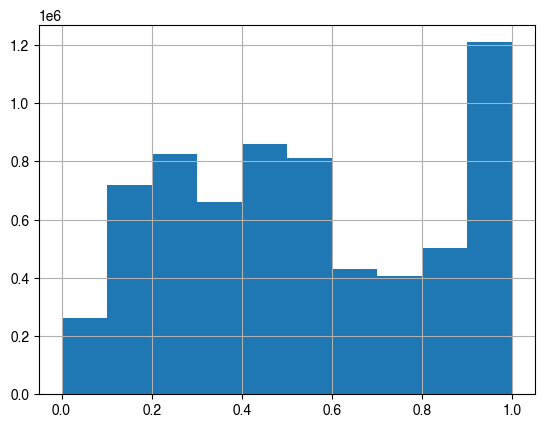

In [26]:
mutations.FRS.hist(bins=numpy.arange(0,1.1,0.1))

In [27]:
mutations

MUTATION  \
UNIQUEID                                      GENE   GENE_POSITION                
site.02.subj.0069.lab.22A019.iso.1            PE1    485.0                L485L   
                                                     1474.0         1474_ins_gc   
                                              PE13   54.0                  H54Y   
                                              PE14   106.0                A106A   
                                              PE16   96.0                  A96A   
...                                                                         ...   
site.07.subj.FD_127_4242.lab.12_0613161.iso.1 yjcE   190.0                R190W   
                                              yrbE2A 111.0                A111A   
                                                     160.0                L160L   
                                              zwf1   317.0                A317S   
                                              zwf2   438.0                F438L   

                                                                    REF   ALT  \
UNIQUEID                                      GENE   GENE_POSITION              
site.02.subj.0069.lab.22A019.iso.1            PE1    485.0          ctg   ttg   
                                                     1474.0         NaN  None   
                                              PE13   54.0           cac   tac   
                                              PE14   106.0          gca   gcc   
                                              PE16   96.0           gcg   gct   
...                                                                 ...   ...   
site.07.subj.FD_127_4242.lab.12_0613161.iso.1 yjcE   190.0          cgg   tgg   
                                              yrbE2A 111.0          gcc   gcg   
                                                     160.0          ctt   ctc   
                                              zwf1   317.0          gcc   tcc   
                                              zwf2   438.0          ttc   ctc   

                                                                    NUCLEOTIDE_NUMBER  \
UNIQUEID                                      GENE   GENE_POSITION                      
site.02.subj.0069.lab.22A019.iso.1            PE1    485.0                        NaN   
                                                     1474.0                       NaN   
                                              PE13   54.0                         NaN   
                                              PE14   106.0                        NaN   
                                              PE16   96.0                         NaN   
...                                                                               ...   
site.07.subj.FD_127_4242.lab.12_0613161.iso.1 yjcE   190.0                        NaN   
                                              yrbE2A 111.0                        NaN   
                                                     160.0                        NaN   
                                              zwf1   317.0                        NaN   
                                              zwf2   438.0                        NaN   

                                                                    NUCLEOTIDE_INDEX  \
UNIQUEID                                      GENE   GENE_POSITION                     
site.02.subj.0069.lab.22A019.iso.1            PE1    485.0                       NaN   
                                                     1474.0                      NaN   
                                              PE13   54.0                        NaN   
                                              PE14   106.0                       NaN   
                                              PE16   96.0                        NaN   
...                                                                              ...   
site.07.subj.FD_127_4242.lab.12_0613161.iso.1 yjcE   190.0                 

In [31]:
mutations[(mutations.IS_MINOR) & (mutations.FRS>=0.9)]

MUTATION  \
UNIQUEID                                      GENE      GENE_POSITION            
site.02.subj.0069.lab.22A019.iso.1            PE_PGRS10  225.0           R225Z   
                                                         227.0           R227Z   
                                                         509.0           G509Z   
                                                         522.0           G522Z   
                                                         523.0           A523Z   
...                                                                        ...   
site.07.subj.FD_127_4242.lab.12_0613161.iso.1 Rv0278c    807.0           R807Z   
                                              Rv1716     178.0           S178Z   
                                              Rv2082     272.0           P272Z   
                                                         273.0           G273Z   
                                              Rv2478c   -9.0              t-9z   

                                                                       REF  \
UNIQUEID                                      GENE      GENE_POSITION        
site.02.subj.0069.lab.22A019.iso.1            PE_PGRS10  225.0         agg   
                                                         227.0         cgc   
                                                         509.0         ggc   
                                                         522.0         ggg   
                                                         523.0         gcc   
...                                                                    ...   
site.07.subj.FD_127_4242.lab.12_0613161.iso.1 Rv0278c    807.0         cgc   
                                              Rv1716     178.0         agt   
                                              Rv2082     272.0         ccg   
                                                         273.0         ggt   
                                              Rv2478c   -9.0             t   

                                                                       ALT  \
UNIQUEID                                      GENE      GENE_POSITION        
site.02.subj.0069.lab.22A019.iso.1            PE_PGRS10  225.0         ggg   
                                                         227.0         ggc   
                                                         509.0         ggt   
                                                         522.0         gga   
                                                         523.0         agc   
...                                                                    ...   
site.07.subj.FD_127_4242.lab.12_0613161.iso.1 Rv0278c    807.0         ggc   
                                              Rv1716     178.0         ggt   
                                              Rv2082     272.0         cca   
                                                         273.0         tgt   
                                              Rv2478c   -9.0             c   

                                                                       NUCLEOTIDE_NUMBER  \
UNIQUEID                                      GENE      GENE_POSITION                      
site.02.subj.0069.lab.22A019.iso.1            PE_PGRS10  225.0                       NaN   
                                                         227.0                       NaN   
                                                         509.0                       NaN   
                                                         522.0                       NaN   
                                                         523.0                       NaN   
...                                                                                  ...   
site.07.subj.FD_127_4242.lab.12_0613161.iso.1 Rv0278c    807.0                       NaN   
                                              Rv1716     178.0                       NaN   
                                              Rv2082 

In [32]:
mutations[(mutations.IS_MINOR) & (mutations.FRS<0.9)]

MUTATION  \
UNIQUEID                                      GENE      GENE_POSITION                   
site.02.subj.0069.lab.22A019.iso.1            PE_PGRS18 71.0                     Y71Z   
                                              PE_PGRS19 111.0                   L111Z   
                                                        136.0                   Y136Z   
                                              PE_PGRS24 693.0          693_minorindel   
                                                        694.0          694_minorindel   
...                                                                               ...   
site.07.subj.FD_127_4242.lab.12_0613161.iso.1 esxO      48.0                     V48Z   
                                                        49.0                     A49Z   
                                                        54.0                     I54Z   
                                                        57.0                     L57Z   
                                              lppB      28.0                     A28Z   

                                                                       REF  \
UNIQUEID                                      GENE      GENE_POSITION        
site.02.subj.0069.lab.22A019.iso.1            PE_PGRS18 71.0           tac   
                                              PE_PGRS19 111.0          ttg   
                                                        136.0          tac   
                                              PE_PGRS24 693.0          NaN   
                                                        694.0          NaN   
...                                                                    ...   
site.07.subj.FD_127_4242.lab.12_0613161.iso.1 esxO      48.0           gtg   
                                                        49.0           gct   
                                                        54.0           atc   
                                                        57.0           ctg   
                                              lppB      28.0           gcc   

                                                                        ALT  \
UNIQUEID                                      GENE      GENE_POSITION         
site.02.subj.0069.lab.22A019.iso.1            PE_PGRS18 71.0            tat   
                                              PE_PGRS19 111.0           tgg   
                                                        136.0           tat   
                                              PE_PGRS24 693.0          None   
                                                        694.0          None   
...                                                                     ...   
site.07.subj.FD_127_4242.lab.12_0613161.iso.1 esxO      48.0            gcg   
                                                        49.0            gcc   
                                                        54.0            att   
                                                        57.0            ttg   
                                              lppB      28.0            gcg   

                                                                       NUCLEOTIDE_NUMBER  \
UNIQUEID                                      GENE      GENE_POSITION                      
site.02.subj.0069.lab.22A019.iso.1            PE_PGRS18 71.0                         NaN   
                                              PE_PGRS19 111.0                        NaN   
                                                        136.0                        NaN   
                                              PE_PGRS24 693.0                        NaN   
                                                        694.0                        NaN   
...                                                                                  ...   
site.07.subj.FD_127_4242.lab.12_0613161.iso.1 esxO      48.0                         NaN   
                                                

In [34]:
import copy

In [35]:
muts = copy.deepcopy(mutations)
muts

MUTATION  \
UNIQUEID                                      GENE   GENE_POSITION                
site.02.subj.0069.lab.22A019.iso.1            PE1    485.0                L485L   
                                                     1474.0         1474_ins_gc   
                                              PE13   54.0                  H54Y   
                                              PE14   106.0                A106A   
                                              PE16   96.0                  A96A   
...                                                                         ...   
site.07.subj.FD_127_4242.lab.12_0613161.iso.1 yjcE   190.0                R190W   
                                              yrbE2A 111.0                A111A   
                                                     160.0                L160L   
                                              zwf1   317.0                A317S   
                                              zwf2   438.0                F438L   

                                                                    REF   ALT  \
UNIQUEID                                      GENE   GENE_POSITION              
site.02.subj.0069.lab.22A019.iso.1            PE1    485.0          ctg   ttg   
                                                     1474.0         NaN  None   
                                              PE13   54.0           cac   tac   
                                              PE14   106.0          gca   gcc   
                                              PE16   96.0           gcg   gct   
...                                                                 ...   ...   
site.07.subj.FD_127_4242.lab.12_0613161.iso.1 yjcE   190.0          cgg   tgg   
                                              yrbE2A 111.0          gcc   gcg   
                                                     160.0          ctt   ctc   
                                              zwf1   317.0          gcc   tcc   
                                              zwf2   438.0          ttc   ctc   

                                                                    NUCLEOTIDE_NUMBER  \
UNIQUEID                                      GENE   GENE_POSITION                      
site.02.subj.0069.lab.22A019.iso.1            PE1    485.0                        NaN   
                                                     1474.0                       NaN   
                                              PE13   54.0                         NaN   
                                              PE14   106.0                        NaN   
                                              PE16   96.0                         NaN   
...                                                                               ...   
site.07.subj.FD_127_4242.lab.12_0613161.iso.1 yjcE   190.0                        NaN   
                                              yrbE2A 111.0                        NaN   
                                                     160.0                        NaN   
                                              zwf1   317.0                        NaN   
                                              zwf2   438.0                        NaN   

                                                                    NUCLEOTIDE_INDEX  \
UNIQUEID                                      GENE   GENE_POSITION                     
site.02.subj.0069.lab.22A019.iso.1            PE1    485.0                       NaN   
                                                     1474.0                      NaN   
                                              PE13   54.0                        NaN   
                                              PE14   106.0                       NaN   
                                              PE16   96.0                        NaN   
...                                                                              ...   
site.07.subj.FD_127_4242.lab.12_0613161.iso.1 yjcE   190.0                 

In [61]:
muts.loc[(muts.IS_MINOR) & (muts.FRS>=0.9), 'MUTATION'] = muts[(muts.IS_MINOR) & (muts.FRS>=0.9)]['MINOR_MUTATION']
muts.loc[(muts.IS_MINOR) & (muts.FRS>=0.9), 'MINOR_MUTATION'] = None
muts.loc[(muts.IS_MINOR) & (muts.FRS>=0.9), 'MINOR_READS'] = numpy.nan
muts.loc[(muts.IS_MINOR) & (muts.FRS>=0.9), 'IS_MINOR'] = False

In [62]:
muts[(muts.IS_MINOR) & (muts.FRS>=0.9)]

,,,MUTATION,REF,ALT,NUCLEOTIDE_NUMBER,NUCLEOTIDE_INDEX,CODES_PROTEIN,INDEL_LENGTH,INDEL_NUCLEOTIDES,AMINO_ACID_NUMBER,AMINO_ACID_SEQUENCE,NUMBER_NUCLEOTIDE_CHANGES,IS_NULL,IS_MINOR,MINOR_MUTATION,MINOR_READS,COVERAGE,FRS
UNIQUEID,GENE,GENE_POSITION,,,,,,,,,,,,,,,,,


In [49]:
foo[foo.IS_MINOR & (foo.FRS<0.9)   ]

MUTATION  \
UNIQUEID                            GENE      GENE_POSITION                    
site.02.subj.0069.lab.22A019.iso.1  PE_PGRS18 71.0                      Y71Z   
                                    PE_PGRS19 111.0                    L111Z   
                                              136.0                    Y136Z   
                                    PE_PGRS24 693.0           693_minorindel   
                                              694.0           694_minorindel   
...                                                                      ...   
site.04.subj.03109.lab.825946.iso.1 pknH      1049.0         1049_minorindel   
                                              396.0                    P396Z   
                                              404.0                    L404Z   
                                              407.0                    G407Z   
                                    pks12     3074.0                  A3074Z   

                                                             REF   ALT  \
UNIQUEID                            GENE      GENE_POSITION              
site.02.subj.0069.lab.22A019.iso.1  PE_PGRS18 71.0           tac   tat   
                                    PE_PGRS19 111.0          ttg   tgg   
                                              136.0          tac   tat   
                                    PE_PGRS24 693.0          NaN  None   
                                              694.0          NaN  None   
...                                                          ...   ...   
site.04.subj.03109.lab.825946.iso.1 pknH      1049.0         NaN  None   
                                              396.0          ccg   cca   
                                              404.0          tta   ttt   
                                              407.0          ggc   gtc   
                                    pks12     3074.0         gcc   gtc   

                                                             NUCLEOTIDE_NUMBER  \
UNIQUEID                            GENE      GENE_POSITION                      
site.02.subj.0069.lab.22A019.iso.1  PE_PGRS18 71.0                         NaN   
                                    PE_PGRS19 111.0                        NaN   
                                              136.0                        NaN   
                                    PE_PGRS24 693.0                        NaN   
                                              694.0                        NaN   
...                                                                        ...   
site.04.subj.03109.lab.825946.iso.1 pknH      1049.0                       NaN   
                                              396.0                        NaN   
                                              404.0                        NaN   
                                              407.0                        NaN   
                                    pks12     3074.0                       NaN   

                                                             NUCLEOTIDE_INDEX  \
UNIQUEID                            GENE      GENE_POSITION                     
site.02.subj.0069.lab.22A019.iso.1  PE_PGRS18 71.0                        NaN   
                                    PE_PGRS19 111.0                       NaN   
                                              136.0                       NaN   
                                    PE_PGRS24 693.0                       NaN   
                                              694.0                       NaN   
...                                                                       ...   
site.04.subj.03109.lab.825946.iso.1 pknH      1049.0                      NaN   
                                              396.0                       NaN   
                                              404.0                       NaN   
                                              407.0                       NaN   
                         

In [63]:
len(muts)

61560317

In [64]:
len(mutations)

61560317